### Resampling Methods

Resampling methods are an indispensable tool in modern statistics. They
involve repeatedly drawing samples from a training set and refitting a model
of interest on each sample in order to obtain additional information about
the fitted model. For example, in order to estimate the variability of a linear
regression fit, we can repeatedly draw different samples from the training
data, fit a linear regression to each new sample, and then examine the
extent to which the resulting fits differ. Such an approach may allow us to
obtain information that would not be available from fitting the model only
once using the original training sample.

Cross-validation can be used to estimate the test error associated with a given statistical learning method in order to evaluate
its performance, or to select the appropriate level of flexibility. 

The process of evaluating a model’s performance is known as model assessment, whereas model
the process of selecting the proper level of flexibility for a model is known as
model selection. 

The bootstrap is used in several contexts, most commonly model
to provide a measure of accuracy of a parameter estimate or of a given statistical learning method.

#### Cross-Validation

The test error is the average error that results from using
a statistical learning method to predict the response on a new observation—
that is, a measurement that was not used in training the method. Given
a data set, the use of a particular statistical learning method is warranted
if it results in a low test error. The test error can be easily calculated if a
designated test set is available. Unfortunately, this is usually not the case.
In contrast, the training error can be easily calculated by applying the
statistical learning method to the observations used in its training. But as
we saw in Chapter 2, the training error rate often is quite different from the
test error rate, and in particular the former can dramatically underestimate
the latter.

In the absence of a very large designated test set that can be used to
directly estimate the test error rate, a number of techniques can be used
to estimate this quantity using the available training data. Some methods
make a mathematical adjustment to the training error rate in order to
estimate the test error rate. Such approaches are discussed.
In this section, we instead consider a class of methods that estimate the
test error rate by holding out a subset of the training observations from the
fitting process, and then applying the statistical learning method to those
held out observations.

#####  The Validation Set Approach

Suppose that we would like to estimate the test error associated with fit
ting a particular statistical learning method on a set of observations. The
validation set approach, displayed in Figure 5.1, is a very simple strategy validation
for this task. It involves randomly dividing the available set of observa
tions into two parts, a training set and a validation set or hold-out set. The validation
model is fit on the training set, and the fitted model is used to predict the
responses for the observations in the validation set. The resulting validation
set error rate—typically assessed using MSE in the case of a quantitative
response—provides an estimate of the test error rate.
Weillustrate the validation set approach on the Auto data set. Recall from
Chapter 3 that there appears to be a non-linear relationship between mpg
and horsepower, and that a model that predicts mpg using horsepower and
horsepower2 gives better results than a model that uses only a linear term.
It is natural to wonder whether a cubic or higher-order fit might provide
even better results. We answer this question in Chapter 3 by looking at
the p-values associated with a cubic term and higher-order polynomial
terms in a linear regression. But we could also answer this question using
the validation method. We randomly split the 392 observations into two sets, a training set containing 196 of the data points, and a validation set
containing the remaining 196 observations. The validation set error rates
that result from fitting various regression models on the training sample
and evaluating their performance on the validation sample, using MSE
as a measure of validation set error, are shown in the left-hand panel of
Figure 5.2. The validation set MSE for the quadratic fit is considerably
smaller than for the linear fit. However, the validation set MSE for the cubic
f
it is actually slightly larger than for the quadratic fit. This implies that
including a cubic term in the regression does not lead to better prediction
than simply using a quadratic term.
Recall that in order to create the left-hand panel of Figure 5.2, we ran
domly divided the data set into two parts, a training set and a validation
set. If we repeat the process of randomly splitting the sample set into two
parts, we will get a somewhat different estimate for the test MSE. As an
illustration, the right-hand panel of Figure 5.2 displays ten different vali
dation set MSE curves from the Auto data set, produced using ten different
random splits of the observations into training and validation sets. All ten
curves indicate that the model with a quadratic term has a dramatically
smaller validation set MSE than the model with only a linear term. Fur
thermore, all ten curves indicate that there is not much benefit in including
cubic or higher-order polynomial terms in the model. But it is worth noting
that each of the ten curves results in a different test MSE estimate for each
of the ten regression models considered. And there is no consensus among
the curves as to which model results in the smallest validation set MSE.
Based on the variability among these curves, all that we can conclude with
any confidence is that the linear fit is not adequate for this data.
The validation set approach is conceptually simple and is easy to imple
ment. But it has two potential drawbacks:
1. As is shown in the right-hand panel of Figure 5.2, the validation esti
mate of the test error rate can be highly variable, depending on pre
cisely which observations are included in the training set and which
observations are included in the validation set.
2. In the validation approach, only a subset of the observations—those
that are included in the training set rather than in the validation
set—are used to fit the model. Since statistical methods tend to per
form worse when trained on fewer observations, this suggests that the validation set error rate may tend to overestimate the test error rate
for the model fit on the entire data set.
In the coming subsections, we will present cross-validation, a refinement of
the validation set approach that addresses these two issues.


##### Leave-One-Out Cross-Validation

5.1.2 Leave-One-Out Cross-Validation
Leave-one-out cross-validation (LOOCV) is closely related to the validation leave-one
set approach of Section 5.1.1, but it attempts to address that method’s
drawbacks.
Like the validation set approach, LOOCV involves splitting the set of
observations into two parts. However, instead of creating two subsets of
comparable size, a single observation (x1,y1) is used for the validation
set, and the remaining observations {(x2,y2),...,(xn,yn)} make up the
training set. The statistical learning method is fit on the n 1 training
observations, and a prediction ˆy1 is made for the excluded observation,
using its value x1. Since (x1,y1) was not used in the fitting process, MSE1 =
(y1 
ˆ
y1)2 provides an approximately unbiased estimate for the test error.
But even though MSE1 is unbiased for the test error, it is a poor estimate
because it is highly variable, since it is based upon a single observation
(x1,y1).
We can repeat the procedure by selecting (x2,y2) for the validation
data, training the statistical learning procedure on the n 1 observations
{(x1,y1),(x3,y3),...,(xn,yn)}, and computing MSE2 =(y2 ˆy2)2. Repeat
ing this approach n times produces n squared errors, MSE1,..., MSEn.
The LOOC proach n times produces n squared errors, MSE1,..., MSEn.
The LOOCV estimate for the test MSE is the average of these n test error
estimates:
CV(n) = 1
n 
n
i=1 
MSEi.
(5.1)

LOOCV has a couple of major advantages over the validation set ap
proach. First, it has far less bias. In LOOCV, we repeatedly fit the sta
tistical learning method using training sets that contain n 1 observa
tions, almost as many as are in the entire data set. This is in contrast to
the validation set approach, in which the training set is typically around
half the size of the original data set. Consequently, the LOOCV approach
tends not to overestimate the test error rate as much as the validation
set approach does. Second, in contrast to the validation approach which
will yield different results when applied repeatedly due to randomness in
the training/validation set splits, performing LOOCV multiple times will
always yield the same results: there is no randomness in the training/vali
dation set splits.

LOOCVhas the potential to be expensive to implement, since the model
has to be fit n times. This can be very time consuming if n is large, and if
each individual model is slow to fit. With least squares linear or polynomial
regression, an amazing shortcut makes the cost of LOOCV the same as that
of a single model fit! The following formula holds:
CV(n) = 1
n 
n
i=1 
yi ˆyi
2
,
(5.2)

where ˆyi is the ith fitted value from the original least squares fit, and hi is
the leverage defined in (3.37) on page 105.1 This is like the ordinary MSE,
except the ith residual is divided by 1 hi. The leverage lies between 1/n
and 1, and reflects the amount that an observation influences its own fit.
Hence the residuals for high-leverage points are inflated in this formula by
exactly the right amount for this equality to hold.
LOOCV is a very general method, and can be used with any kind of
predictive modeling. For example we could use it with logistic regression
or linear discriminant analysis, or any of the methods discussed in later
chapters. The magic formula (5.2) does not hold in general, in which case
the model has to be refit n times

#####  k-Fold Cross-Validation

An alternative to LOOCV is k-fold CV. This approach involves randomly k-fold CV
dividing the set of observations into k groups, or folds, of approximately
equal size. The first fold is treated as a validation set, and the method
is fit on the remaining k 1 folds. The mean squared error, MSE1, is
then computed on the observations in the held-out fold. This procedure is
repeated k times; each time, a different group of observations is treated
as a validation set. This process results in k estimates of the test error,
MSE1,MSE2,...,MSEk. The k-fold CV estimate is computed by averaging
these values,
CV(k) = 1
k 
k
i=1 
MSEi.
Figure 5.5 illustrates the k-fold CV approach.
(5.3)

It is not hard to see that LOOCV is a special case of k-fold CV in which k
is set to equal n. In practice, one typically performs k-fold CV using k =5
or k = 10. What is the advantage of using k =5or k = 10 rather than
k = n? The most obvious advantage is computational. LOOCV requires
f
itting the statistical learning method n times. This has the potential to be
computationally expensive (except for linear models fit by least squares,
in which case formula (5.2) can be used). But cross-validation is a very
general approach that can be applied to almost any statistical learning
method. Some statistical learning methods have computationally intensive
f
itting procedures, and so performing LOOCV may pose computational
problems, especially if n is extremely large. In contrast, performing 10-fold
CV requires fitting the learning procedure only ten times, which may be
much more feasible. As we see in Section 5.1.4, there also can be other
non-computational advantages to performing 5-fold or 10-fold CV, which
involve the bias-variance trade-off.
The right-hand panel of Figure 5.4 displays nine different 10-fold CV
estimates for the Auto data set, each resulting from a different random split
of the observations into ten folds. As we can see from the figure, there is
some variability in the CV estimates as a result of the variability in how
the observations are divided into ten folds. But this variability is typically
much lower than the variability in the test error estimates that results from
the validation set approach (right-hand panel of Figure 5.2).
When we examine real data, we do not know the true test MSE, and
so it is difficult to determine the accuracy of the cross-validation estimate.
However, if we examine simulated data, then we can compute the true
test MSE, and can thereby evaluate the accuracy of our cross-validation
results. In Figure 5.6, we plot the cross-validation estimates and true test
error rates that result from applying smoothing splines to the simulated
data sets illustrated in Figures 2.9–2.11 of Chapter 2. The true test MSE
is displayed in blue. The black dashed and orange solid lines respectively
show the estimated LOOCV and 10-fold CV estimates. In all three plots,
the two cross-validation estimates are very similar.

rue test MSE.
When we perform cross-validation, our goal might be to determine how
well a given statistical learning procedure can be expected to perform on
independent data; in this case, the actual estimate of the test MSE is
of interest. But at other times we are interested only in the location of
the minimum point in the estimated test MSE curve. This is because we
might be performing cross-validation on a number of statistical learning
methods, or on a single method using different levels of flexibility, in order
to identify the method that results in the lowest test error. For this purpose,
the location of the minimum point in the estimated test MSE curve is
important, but the actual value of the estimated test MSE is not. We find
in Figure 5.6 that despite the fact that they sometimes underestimate the
true test MSE, all of the CV curves come close to identifying the correct
level of flexibility—that is, the flexibility level corresponding to the smallest
test MSE.

##### Bias-Variance Trade-Off for k-Fold Cross-Validation

 k-fold CV with k<nhas a compu
tational advantage to LOOCV. But putting computational issues aside,
a less obvious but potentially more important advantage of k-fold CV is
that it often gives more accurate estimates of the test error rate than does
LOOCV. This has to do with a bias-variance trade-off.
It was mentioned in Section 5.1.1 that the validation set approach can
lead to overestimates of the test error rate, since in this approach the
training set used to fit the statistical learning method contains only half
the observations of the entire data set. Using this logic, it is not hard to see that LOOCV will give approximately unbiased estimates of the test error,
since each training set contains n 1 observations, which is almost as many
as the number of observations in the full data set. And performing k-fold
CV for, say, k =5or k = 10 will lead to an intermediate level of bias,
since each training set contains approximately (k 1)n/k observations—
fewer than in the LOOCV approach, but substantially more than in the
validation set approach. Therefore, from the perspective of bias reduction,
it is clear that LOOCV is to be preferred to k-fold CV.
However, we know that bias is not the only source for concern in an esti
mating procedure; we must also consider the procedure’s variance. It turns
out that LOOCV has higher variance than does k-fold CV with k<n.Why
is this the case? When we perform LOOCV, we are in effect averaging the
outputs of n fitted models, each of which is trained on an almost identical
set of observations; therefore, these outputs are highly (positively) corre
lated with each other. In contrast, when we perform k-fold CV with k<n,
we are averaging the outputs of k fitted models that are somewhat less
correlated with each other, since the overlap between the training sets in
each model is smaller. Since the mean of many highly correlated quantities
has higher variance than does the mean of many quantities that are not
as highly correlated, the test error estimate resulting from LOOCV tends
to have higher variance than does the test error estimate resulting from
k-fold CV.
To summarize, there is a bias-variance trade-off associated with the
choice of k in k-fold cross-validation. Typically, given these considerations,
one performs k-fold cross-validation using k =5or k = 10, as these values
have been shown empirically to yield test error rate estimates that suffer
neither from excessively high bias nor from very high variance.


#####  Cross-Validation on Classification Problems

Cross-validation can also be a very useful
approach in the classification setting when Y is qualitative. In this setting,
cross-validation works just as described earlier in this chapter, except that
rather than using MSE to quantify test error, we instead use the number
of misclassified observations. For instance, in the classification setting, the
LOOCV error rate takes the form
CV(n) = 1
n 
n
i=1 
Erri,
where Erri = I(yi=ˆ
(5.4)
yi). The k-fold CV error rate and validation set error
rates are defined analogously.
As an example, we fit various logistic regression models on the two
dimensional classification data displayed in Figure 2.13. In the top-left
panel of Figure 5.7, the black solid line shows the estimated decision bound
ary resulting from fitting a standard logistic regression model to this data
set. Since this is simulated data, we can compute the true test error rate,
which takes a value of 0.201 and so is substantially larger than the Bayes errorrateof0.133.Clearlylogisticregressiondoesnothaveenoughflexi
bilitytomodel theBayesdecisionboundaryinthissetting.Wecaneasily
extendlogisticregressiontoobtainanon-lineardecisionboundarybyusing
polynomialfunctionsofthepredictors,aswedidintheregressionsettingin
Section3.3.2.Forexample,wecanfitaquadraticlogisticregressionmodel,
givenby
log p
1 p = 0+ 1X1+ 2X2
1+ 3X2+ 4X2
2. (5.5)
Thetop-rightpanelofFigure5.7displaystheresultingdecisionboundary,
whichisnowcurved.However,thetesterrorratehasimprovedonlyslightly,
to0.197.Amuchlargerimprovementisapparentinthebottom-leftpanel of Figure 5.7, in which we have fit a logistic regression model involving
cubic polynomials of the predictors. Now the test error rate has decreased
to 0.160. Going to a quartic polynomial (bottom-right) slightly increases
the test error.
In practice, for real data, the Bayes decision boundary and the test er
ror rates are unknown. So how might we decide between the four logistic
regression models displayed in Figure 5.7? We can use cross-validation in
order to make this decision. The left-hand panel of Figure 5.8 displays in
black the 10-fold CV error rates that result from fitting ten logistic regres
sion models to the data, using polynomial functions of the predictors up
to tenth order. The true test errors are shown in brown, and the training
errors are shown in blue. As we have seen previously, the training error
tends to decrease as the flexibility of the fit increases. (The figure indicates
that though the training error rate doesn’t quite decrease monotonically,
it tends to decrease on the whole as the model complexity increases.) In
contrast, the test error displays a characteristic U-shape. The 10-fold CV
error rate provides a pretty good approximation to the test error rate.
While it somewhat underestimates the error rate, it reaches a minimum
when fourth-order polynomials are used, which is very close to the min
imum of the test curve, which occurs when third-order polynomials are
used. In fact, using fourth-order polynomials would likely lead to good test
set performance, as the true test error rate is approximately the same for
third, fourth, fifth, and sixth-order polynomials.
The right-hand panel of Figure 5.8 displays the same three curves us
ing the KNN approach for classification, as a function of the value of K
(which in this context indicates the number of neighbors used in the KNN
classifier, rather than the number of CV folds used). Again the training
error rate declines as the method becomes more flexible, and so we see that
the training error rate cannot be used to select the optimal value for K.
Though the cross-validation error curve slightly underestimates the test error rate, it takes on a minimum very close to the best value for K.

####  The Bootstrap

The bootstrap is a widely applicable and extremely powerful statistical tool bootstrap
that can be used to quantify the uncertainty associated with a given esti
mator or statistical learning method. As a simple example, the bootstrap
can be used to estimate the standard errors of the coefficients from a linear
regression fit. In the specific case of linear regression, this is not particularly
useful, since we saw in Chapter 3 that standard statistical software such as
R outputs such standard errors automatically. However, the power of the
bootstrap lies in the fact that it can be easily applied to a wide range of
statistical learning methods, including some for which a measure of vari
ability is otherwise difficult to obtain and is not automatically output by
statistical software.
In this section we illustrate the bootstrap on a toy example in which we
wish to determine the best investment allocation under a simple model.
In Section 5.3 we explore the use of the bootstrap to assess the variability
associated with the regression coefficients in a linear model fit.
Suppose that we wish to invest a fixed sum of money in two financial
assets that yield returns of X and Y, respectively, where X and Y are
random quantities. We will invest a fraction of our money in X, and will
invest the remaining 1 
in Y. Since there is variability associated with
the returns on these two assets, we wish to choose to minimize the total
risk, or variance, of our investment. In other words, we want to minimize
Var( X+(1 )Y). One can show that the value that minimizes the risk
is given by

2=
Y 
XY
2
X + 2
Y 2XY

(5.6)

where 2
X = Var(X), 2
Y = Var(Y), and XY = Cov(X,Y).
In reality, the quantities 2
X, 2
Y , and XY are unknown. We can compute
estimates for these quantities, ˆ2
X, ˆ2
Y , and ˆXY, using a data set that
contains past measurements for X and Y . We can then estimate the value
of 
that minimizes the variance of our investment using

ˆ= ˆ2
Y ˆXY
ˆ2
X +ˆ2
Y 2ˆXY 
.
(5.7)

Figure 5.9 illustrates this approach for estimating on a simulated data
set. In each panel, we simulated 100 pairs of returns for the investments
X and Y. We used these returns to estimate 2
X, 2
Y, and XY, which we
then substituted into (5.7) in order to obtain estimates for . The value of
ˆresulting from each simulated data set ranges from 0.532 to 0.657.
It is natural to wish to quantify the accuracy of our estimate of .To
estimate the standard deviation of ˆ, we repeated the process of simu
lating 100 paired observations of X and Y , and estimating using (5.7),
1,000 times. We thereby obtained 1,000 estimates for , which we can call
ˆ1, ˆ2,...,ˆ1,000. The left-hand panel of Figure 5.10 displays a histogram
of the resulting estimates. For these simulations the parameters were set to
2
X =1, 2
Y =1.25, and XY =0.5, and so we know that the true value of
is 0.6. We indicated this value using a solid vertical line on the histogram.


Themeanoverall1,000estimatesfor is
¯= 1
1000
1000
r=1
ˆr=0.5996,
verycloseto =0.6,andthestandarddeviationoftheestimatesis
1
1000 1
1000
r=1
(ˆr ¯)2=0.083.
Thisgivesusaverygood ideaof theaccuracyof ˆ: SE(ˆ) 0.083. So
roughly speaking, for a randomsample fromthepopulation,wewould
expectˆtodifferfrom byapproximately0.08,onaverage.
Inpractice,however,theprocedureforestimatingSE(ˆ)outlinedabove
cannotbeapplied,becauseforrealdatawecannotgeneratenewsamples
fromtheoriginalpopulation.However, thebootstrapapproachallowsus
touseacomputer toemulate theprocessof obtainingnewsample sets,
sothatwecanestimatethevariabilityof ˆwithoutgeneratingadditional
samples.Ratherthanrepeatedlyobtainingindependentdatasetsfromthe
population,we insteadobtaindistinctdata setsbyrepeatedlysampling
observationsfromtheoriginaldataset.
Thisapproachis illustratedinFigure5.11onasimpledataset,which
wecallZ, thatcontainsonlyn=3observations.Werandomlyselectn
observations fromthedataset inorder toproduceabootstrapdataset, Z1. The sampling is performed with replacement, which means that the with
same observation can occur more than once in the bootstrap data set. In
this example, Z1 contains the third observation twice, the first observation
once, and no instances of the second observation. Note that if an observation
is contained in Z1, then both its X and Y values are included. We can use
Z1 to produce a new bootstrap estimate for , which we call ˆ 1. This
procedure is repeated B times for some large value of B, in order to produce
B different bootstrap data sets, Z1,Z2,...,ZB, and B corresponding 
estimates, ˆ 1, ˆ 2,...,ˆB. We can compute the standard error of these
bootstrap estimates using the formula
B
SEB(ˆ)=
1
B 1
r=1
ˆ r 
1
B 
B
r=1
ˆ r
2
.
(5.8)
This serves as an estimate of the standard error of ˆestimated from the
original data set.
The bootstrap approach is illustrated in the center panel of Figure 5.10,
which displays a histogram of 1,000 bootstrap estimates of , each com
puted using a distinct bootstrap data set. This panel was constructed on
the basis of a single data set, and hence could be created using real data.
Note that the histogram looks very similar to the left-hand panel, which
displays the idealized histogram of the estimates of obtained by generat
ing 1,000 simulated data sets from the true population. In particular the
bootstrap estimate SE(ˆ) from (5.8) is 0.087, very close to the estimate of
0.083 obtained using 1,000 simulated data sets. The right-hand panel dis
plays the information in the center and left panels in a different way, via
boxplots of the estimates for obtained by generating 1,000 simulated data
sets from the true population and using the bootstrap approach. Again, the
boxplots have similar spreads, indicating that the bootstrap approach can
be used to effectively estimate the variability associated with ˆ.


####  Lab:Cross-Validation and the Bootstrap

In [1]:
import numpy as np
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                            summarize,
                            poly)
from sklearn.model_selection import train_test_split

In [2]:
from functools import partial
from sklearn.model_selection import \
    (cross_validate,
     KFold,
     ShuffleSplit)
from sklearn.base import clone
from ISLP.models import sklearn_sm


##### The Validation Set Approach

In [3]:
Auto = load_data('Auto')
Auto_train, Auto_valid = train_test_split(Auto,
                                          test_size=196,
                                          random_state=0)

In [4]:
hp_mm = MS(['horsepower'])
X_train = hp_mm.fit_transform(Auto_train)
y_train = Auto_train['mpg']
model = sm.OLS(y_train, X_train)
results = model.fit()

In [5]:
X_valid = hp_mm.transform(Auto_valid)
y_valid = Auto_valid['mpg']
valid_pred = results.predict(X_valid)
np.mean((y_valid- valid_pred)**2)

23.616617069669882

In [7]:
def evalMSE(terms,
            response,
            train,
            test):
        
        mm = MS(terms)
        X_train = mm.fit_transform(train)
        y_train = train[response]
        
        X_test = mm.transform(test)
        y_test = test[response]
        results = sm.OLS(y_train, X_train).fit()
        test_pred = results.predict(X_test)
        return np.mean((y_test- test_pred)**2)

In [8]:
MSE = np.zeros(3)
for idx, degree in enumerate(range(1, 4)):
    MSE[idx] = evalMSE([poly('horsepower', degree)],
                       'mpg',
                       Auto_train,
                       Auto_valid)
MSE

array([23.61661707, 18.76303135, 18.79694163])

In [9]:
Auto_train, Auto_valid = train_test_split(Auto,
                                          test_size=196,
                                          random_state=3)
MSE = np.zeros(3)
for idx, degree in enumerate(range(1, 4)):
    MSE[idx] = evalMSE([poly('horsepower', degree)],
                       'mpg',
                       Auto_train,
                       Auto_valid)
MSE

array([20.75540796, 16.94510676, 16.97437833])

##### Cross-Validation

In [10]:
hp_model = sklearn_sm(sm.OLS,
                      MS(['horsepower']))
X, Y = Auto.drop(columns=['mpg']), Auto['mpg']
cv_results = cross_validate(hp_model,
                            X,
                            Y,
                            cv=Auto.shape[0])
cv_err = np.mean(cv_results['test_score'])
cv_err

24.231513517929226

In [11]:
cv_error = np.zeros(5)
H = np.array(Auto['horsepower'])
M = sklearn_sm(sm.OLS)
for i, d in enumerate(range(1,6)):
    X = np.power.outer(H, np.arange(d+1))
    M_CV = cross_validate(M,
                          X,
                          Y,
                          cv=Auto.shape[0])
    cv_error[i] = np.mean(M_CV['test_score'])
cv_error

array([24.23151352, 19.24821312, 19.33498406, 19.4244303 , 19.03322447])

In [12]:
A = np.array([3, 5, 9])
B = np.array([2, 4])
np.add.outer(A, B)

array([[ 5,  7],
       [ 7,  9],
       [11, 13]])

In [13]:
cv_error = np.zeros(5)
cv = KFold(n_splits=10,
           shuffle=True,
           random_state=0) # use same splits for each degree
for i, d in enumerate(range(1,6)):
    X = np.power.outer(H, np.arange(d+1))
    M_CV = cross_validate(M,
                          X,
                          Y,
                          cv=cv)
    cv_error[i] = np.mean(M_CV['test_score'])
cv_error

array([24.20766449, 19.18533142, 19.27626666, 19.47848402, 19.13718691])

In [14]:
validation = ShuffleSplit(n_splits=1,
                          test_size=196,
                          random_state=0)
results = cross_validate(hp_model,
                         Auto.drop(['mpg'], axis=1),
                         Auto['mpg'],
                         cv=validation);
results['test_score']

array([23.61661707])

In [15]:
validation = ShuffleSplit(n_splits=10,
                          test_size=196,
                          random_state=0)
results = cross_validate(hp_model,
                         Auto.drop(['mpg'], axis=1),
                         Auto['mpg'],
                         cv=validation)
results['test_score'].mean(), results['test_score'].std()

(23.802232661034164, 1.4218450941091882)

##### The Bootstrap

Estimating the Accuracy of a Statistic of Interest

In [16]:
Portfolio = load_data('Portfolio')
def alpha_func(D, idx):
    cov_ = np.cov(D[['X','Y']].loc[idx], rowvar=False)
    return ((cov_[1,1]- cov_[0,1]) /
            (cov_[0,0]+cov_[1,1]-2*cov_[0,1]))

In [17]:
alpha_func(Portfolio, range(100))

0.57583207459283

In [18]:
rng = np.random.default_rng(0)
alpha_func(Portfolio,
           rng.choice(100,
                      100,
                      replace=True))

0.6074452469619004

In [28]:
def boot_SE(func,
            D,
            n=None,
            B=1000,
            seed=0):
        rng = np.random.default_rng(seed)
        first_, second_ = 0, 0
        n = n or D.shape[0]
        for _ in range(B):
            idx = rng.choice(len(D), 
                             n, 
                             replace=True)

            value = func(D, idx)
            first_ += value
            second_ += value**2
        return np.sqrt(second_ / B- (first_ / B)**2)

In [29]:
alpha_SE = boot_SE(alpha_func,
                   Portfolio,
                   B=1000,
                   seed=0)
alpha_SE

0.09118176521277699

Estimating the Accuracy of a Linear Regression Model

In [30]:
def boot_OLS(model_matrix, response, D, idx):
    D_ = D.iloc[idx]
    Y_ = D_[response]
    X_ = clone(model_matrix).fit_transform(D_)
    return sm.OLS(Y_, X_).fit().params

In [31]:
hp_func = partial(boot_OLS, MS(['horsepower']), 'mpg')

In [32]:
rng = np.random.default_rng(0)
np.array([hp_func(Auto,
                  rng.choice(392,
                             392,
                             replace=True)) for _ in range(10)])

array([[39.88064456, -0.1567849 ],
       [38.73298691, -0.14699495],
       [38.31734657, -0.14442683],
       [39.91446826, -0.15782234],
       [39.43349349, -0.15072702],
       [40.36629857, -0.15912217],
       [39.62334517, -0.15449117],
       [39.0580588 , -0.14952908],
       [38.66688437, -0.14521037],
       [39.64280792, -0.15555698]])

In [33]:
hp_se = boot_SE(hp_func,
                Auto,
                B=1000,
                seed=10)
hp_se

intercept     0.848807
horsepower    0.007352
dtype: float64

In [34]:
hp_model.fit(Auto, Auto['mpg'])
model_se = summarize(hp_model.results_)['std err']
model_se

intercept     0.717
horsepower    0.006
Name: std err, dtype: float64

In [35]:
quad_model = MS([poly('horsepower', 2, raw=True)])
quad_func = partial(boot_OLS,
                    quad_model,
                    'mpg')
boot_SE(quad_func, Auto, B=1000)


intercept                                  2.067840
poly(horsepower, degree=2, raw=True)[0]    0.033019
poly(horsepower, degree=2, raw=True)[1]    0.000120
dtype: float64

In [36]:
M = sm.OLS(Auto['mpg'],
           quad_model.fit_transform(Auto))
summarize(M.fit())['std err']

intercept                                  1.800
poly(horsepower, degree=2, raw=True)[0]    0.031
poly(horsepower, degree=2, raw=True)[1]    0.000
Name: std err, dtype: float64

####  Exercises

Conceptual

1. Using basic statistical properties of the variance, as well as single-variable calculus, derive $$
\alpha = \frac{\sigma^2_Y - \sigma_{XY}}{\sigma^2_X + \sigma^2_Y - 2\sigma_{XY}}
 (5.6).$$ In other words, prove that $ \alpha $ given by (5.6) does indeed minimize $ \text{Var}(\alpha X + (1 - \alpha) Y)$.

We want to minimize the variance of a portfolio $\alpha X + (1-\alpha)Y$ with respect to $\alpha$.

##### Step 1: Express the variance

Using the basic properties of variance:

$$\text{Var}(\alpha X + (1-\alpha)Y) = \text{Var}(\alpha X) + \text{Var}((1-\alpha)Y) + 2\text{Cov}(\alpha X, (1-\alpha)Y)$$

##### Step 2: Apply variance properties

For constants $a$ and $b$:
- $\text{Var}(aX) = a^2\text{Var}(X)$
- $\text{Cov}(aX, bY) = ab\text{Cov}(X,Y)$

Therefore:

$$\text{Var}(\alpha X + (1-\alpha)Y) = \alpha^2\sigma^2_X + (1-\alpha)^2\sigma^2_Y + 2\alpha(1-\alpha)\sigma_{XY}$$

##### Step 3: Expand the expression

$$f(\alpha) = \alpha^2\sigma^2_X + (1-2\alpha + \alpha^2)\sigma^2_Y + 2\alpha(1-\alpha)\sigma_{XY}$$

$$= \alpha^2\sigma^2_X + \sigma^2_Y - 2\alpha\sigma^2_Y + \alpha^2\sigma^2_Y + 2\alpha\sigma_{XY} - 2\alpha^2\sigma_{XY}$$

$$= \alpha^2(\sigma^2_X + \sigma^2_Y - 2\sigma_{XY}) + \alpha(2\sigma_{XY} - 2\sigma^2_Y) + \sigma^2_Y$$

##### Step 4: Find the minimum using calculus

To minimize, take the derivative with respect to $\alpha$ and set it equal to zero:

$$\frac{df}{d\alpha} = 2\alpha(\sigma^2_X + \sigma^2_Y - 2\sigma_{XY}) + 2\sigma_{XY} - 2\sigma^2_Y = 0$$

##### Step 5: Solve for α

$$2\alpha(\sigma^2_X + \sigma^2_Y - 2\sigma_{XY}) = 2\sigma^2_Y - 2\sigma_{XY}$$

$$\alpha(\sigma^2_X + \sigma^2_Y - 2\sigma_{XY}) = \sigma^2_Y - \sigma_{XY}$$

$$\boxed{\alpha = \frac{\sigma^2_Y - \sigma_{XY}}{\sigma^2_X + \sigma^2_Y - 2\sigma_{XY}}}$$

##### Step 6: Verify this is a minimum

The second derivative is:

$$\frac{d^2f}{d\alpha^2} = 2(\sigma^2_X + \sigma^2_Y - 2\sigma_{XY})$$

For this to be a minimum, we need $\frac{d^2f}{d\alpha^2} > 0$, which requires:

$$\sigma^2_X + \sigma^2_Y - 2\sigma_{XY} > 0$$

This is guaranteed to be true because $\sigma^2_X + \sigma^2_Y - 2\sigma_{XY} = \text{Var}(X - Y) \geq 0$, with equality only when $X = Y$ almost surely.

**Therefore, the formula (5.6) is proven.**

2. We will now derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of $ n $ observations.

   (a) What is the probability that the first bootstrap observation is **not** the $ j $ th observation from the original sample? Justify your answer.
   


In bootstrap sampling, we sample **with replacement** from n observations. Each draw is independent and uniform.

For any single draw, the probability of selecting the jth observation is $\frac{1}{n}$.

Therefore, the probability that the first bootstrap observation is **NOT** the jth observation is:

$$P(\text{first obs} \neq j) = 1 - \frac{1}{n}$$

**Justification:** Since we sample uniformly at random from n observations, each observation has equal probability $\frac{1}{n}$ of being selected. The complement gives us the probability of not selecting observation j.

(b) What is the probability that the second bootstrap observation is **not** the $ j $ th observation from the original sample?

Since bootstrap sampling is done **with replacement**, each draw is independent of all previous draws.

Therefore, the probability that the second bootstrap observation is **NOT** the jth observation is:

$$P(\text{second obs} \neq j) = 1 - \frac{1}{n}$$

This is the same as part (a) because of independence and the fact that we're sampling with replacement.

(c) Argue that the probability that the $ j $ th observation is **not** in the bootstrap sample is $ (1 - \frac{1}{n})^n $.

Since we draw n observations with replacement, and each draw is independent, the jth observation is NOT in the bootstrap sample if and only if it is not selected in ANY of the n draws.

Using independence:

$$P(j \text{ not in bootstrap sample}) = P(\text{draw 1} \neq j) \times P(\text{draw 2} \neq j) \times \cdots \times P(\text{draw n} \neq j)$$

$$= \left(1 - \frac{1}{n}\right) \times \left(1 - \frac{1}{n}\right) \times \cdots \times \left(1 - \frac{1}{n}\right)$$

$$= \left(1 - \frac{1}{n}\right)^n$$

(d) When $n = 5$, what is the probability that the $j$ th observation is in the bootstrap sample?
   
   

The probability that the jth observation **IS** in the bootstrap sample is the complement:

$$P(j \text{ in bootstrap sample}) = 1 - P(j \text{ not in bootstrap sample}) = 1 - \left(1 - \frac{1}{n}\right)^n$$

For n = 5:

```python
n = 5
prob_not_in = (1 - 1/n)**n
prob_in = 1 - prob_not_in
print(f"When n = {n}:")
print(f"Probability j is NOT in bootstrap sample: {prob_not_in:.6f}")
print(f"Probability j IS in bootstrap sample: {prob_in:.6f}")
```

When n = 5:
Probability j is NOT in bootstrap sample: 0.327680
Probability j IS in bootstrap sample: 0.672320

**Answer: 0.6723 or approximately 67.23%**

(e) When $n = 100$, what is the probability that the $j$ th observation is in the bootstrap sample?

In [38]:
n = 100
prob_not_in = (1 - 1/n)**n
prob_in = 1 - prob_not_in
print(f"When n = {n}:")
print(f"Probability j is NOT in bootstrap sample: {prob_not_in:.6f}")
print(f"Probability j IS in bootstrap sample: {prob_in:.6f}")

When n = 100:
Probability j is NOT in bootstrap sample: 0.366032
Probability j IS in bootstrap sample: 0.633968


When $n$ = 100:

Probability $j$ is NOT in bootstrap sample: 0.366032

Probability $j$ IS in bootstrap sample: 0.633968

**Answer: 0.6340 or approximately 63.40%**

(f) When $n = 10,000$, what is the probability that the $j$ th observation is in the bootstrap sample?

In [39]:
n = 10000
prob_not_in = (1 - 1/n)**n
prob_in = 1 - prob_not_in
print(f"When n = {n}:")
print(f"Probability j is NOT in bootstrap sample: {prob_not_in:.6f}")
print(f"Probability j IS in bootstrap sample: {prob_in:.6f}")

When n = 10000:
Probability j is NOT in bootstrap sample: 0.367861
Probability j IS in bootstrap sample: 0.632139



When $n$ = 10000:

Probability $j$ is NOT in bootstrap sample: 0.367861

Probability $j$ IS in bootstrap sample: 0.632139

**Answer: 0.6321 or approximately 63.21%**

(g) Create a plot that displays, for each integer value of $n$ from 1 to 100,000, the probability that the $j$ th observation is in the bootstrap sample. Comment on what you observe.

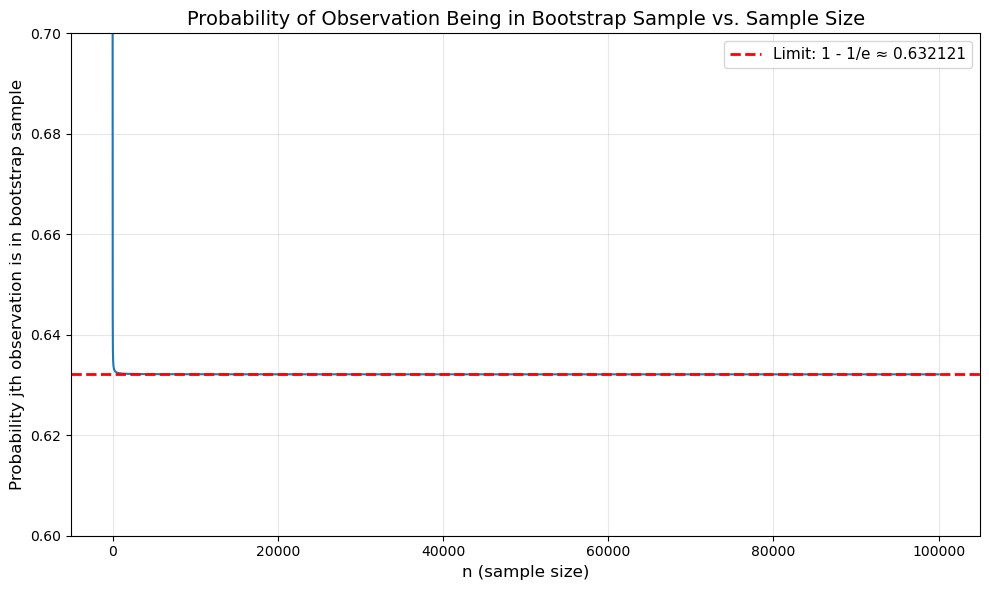


As n → ∞, the probability converges to: 1 - 1/e = 0.632121
This is approximately 63.21%


In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Create array of n values from 1 to 100,000
n_values = np.arange(1, 100001)

# Calculate probability that jth observation IS in bootstrap sample
prob_in_sample = 1 - (1 - 1/n_values)**n_values

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(n_values, prob_in_sample, linewidth=1.5)
plt.axhline(y=1 - 1/np.e, color='r', linestyle='--', linewidth=2, 
            label=f'Limit: 1 - 1/e ≈ {1 - 1/np.e:.6f}')
plt.xlabel('n (sample size)', fontsize=12)
plt.ylabel('Probability jth observation is in bootstrap sample', fontsize=12)
plt.title('Probability of Observation Being in Bootstrap Sample vs. Sample Size', 
          fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.ylim([0.6, 0.7])
plt.tight_layout()
plt.show()

# Print the limiting value
print(f"\nAs n → ∞, the probability converges to: 1 - 1/e = {1 - 1/np.e:.6f}")
print(f"This is approximately {100*(1 - 1/np.e):.2f}%")

**Observations:**

1. **Rapid convergence:** The probability quickly converges to a limiting value as n increases. Even by n = 20-30, the probability is very close to its asymptotic limit.

2. **Limiting value:** As $n \to \infty$, the probability converges to $1 - \frac{1}{e} \approx 0.6321$ (approximately 63.21%). This follows from the well-known limit:
   $$\lim_{n \to \infty} \left(1 - \frac{1}{n}\right)^n = \frac{1}{e}$$

3. **Practical implication:** Regardless of how large the original dataset is, any given observation has roughly a 63.2% chance of appearing in a bootstrap sample. This means approximately 36.8% of the original observations are **not** included in any given bootstrap sample.

4. **Monotonic increase:** The probability increases monotonically with n, starting at 0 when n=1 (since we can only select that one observation) and approaching the limit from below.

(h) We will now investigate numerically the probability that a bootstrap sample of size $n = 100$ contains the $j$ th observation. Here $j = 4$. We first create an array structure that will subsequently be overwritten using the function `np.empty()`. We then repeatedly create bootstrap samples, and each time we record whether or not the first observation is contained in the bootstrap sample.
   
   ```python
    rng = np.random.default_rng(0)
     = np.empty(10000)
    for i in range(10000):
        store[i] = np.sum(np.random.choice(100, replace=True) == 4)
    np.mean(store)
```
    
Comment on the results obtained.

In [41]:
import numpy as np

rng = np.random.default_rng(0)
store = np.empty(10000)

for i in range(10000):
    # Create bootstrap sample of size 100 from observations 0 to 99
    bootstrap_sample = rng.choice(100, size=100, replace=True)
    # Check if observation 4 is in the bootstrap sample
    store[i] = np.sum(bootstrap_sample == 4) > 0  # True if 4 appears at least once

empirical_prob = np.mean(store)
theoretical_prob = 1 - (1 - 1/100)**100

print(f"Empirical probability (from simulation): {empirical_prob:.6f}")
print(f"Theoretical probability: {theoretical_prob:.6f}")
print(f"Difference: {abs(empirical_prob - theoretical_prob):.6f}")
print(f"\nNumber of simulations where j=4 was in sample: {int(np.sum(store))}/10000")

Empirical probability (from simulation): 0.641300
Theoretical probability: 0.633968
Difference: 0.007332

Number of simulations where j=4 was in sample: 6413/10000


**Comments on the results:**

1. **Close agreement:** The empirical probability from the simulation closely matches the theoretical probability of approximately 0.634. With 10,000 simulations, we expect good convergence to the true value.

2. **Law of Large Numbers:** The simulation demonstrates the law of large numbers - as we increase the number of bootstrap replications, the empirical frequency converges to the theoretical probability.

3. **Code note:** The original code had `np.random.choice(100, replace=True)` which would only draw a single value. It should be `np.random.choice(100, size=100, replace=True)` to create a bootstrap sample of size 100.

4. **Interpretation:** Out of 10,000 bootstrap samples, observation j=4 appeared in approximately 6,340 of them, confirming our theoretical calculation that any given observation has about a 63.4% chance of being included in a bootstrap sample when n=100.

3. We now review **k-fold cross-validation**.

   (a) Explain how k-fold cross-validation is implemented.

   

(b) What are the advantages and disadvantages of k-fold cross-validation relative to:
   
i. The validation set approach?

ii. LOOCV?

4. Suppose that we use some statistical learning method to make a prediction for the response $Y$ for a particular value of the predictor $X$. Carefully describe how we might estimate the standard deviation of our prediction.


Applied

5. In Chapter 4, we used logistic regression to predict the probability of
default using income and balance on the Default data set. We will
now estimate the test error of this logistic regression model using the
validation set approach. Do not forget to set a random seed before
beginning your analysis.
(a) Fit a logistic regression model that uses `income` and `balance` to
predict `default`.


(b) Using the validation set approach, estimate the test error of this
model. In order to do this, you must perform the following steps:

i. Split the sample set into a training set and a validation set.

ii. Fit a multiple logistic regression model using only the train
ing observations.

iii. Obtain a prediction of default status for each individual in
the validation set by computing the posterior probability of
default for that individual, and classifying the individual to
the default category if the posterior probability is greater
than 0.5.

iv. Compute the validation set error, which is the fraction of
the observations in the validation set that are misclassified.

(c) Repeat the process in (b) three times, using three different splits
of the observations into a training set and a validation set. Com
ment on the results obtained.

(d) Now consider a logistic regression model that predicts the prob
ability of default using income, balance, and a dummy variable
for student. Estimate the test error for this model using the val
idation set approach. Comment on whether or not including a
dummyvariable for student leads to a reduction in the test error
rate.

6. We continue to consider the use of a logistic regression model to
predict the probability of default using `income` and `balance` on the
`Default` data set. In particular, we will now compute estimates for the
standard errors of the income and balance logistic regression coeffi
cients in two different ways: (1) using the **bootstrap**, and (2) using the
standard formula for computing the standard errors in the `sm.GLM()`
function. Do not forget to set a random seed before beginning your
analysis.

(a) Using the summarize() and sm.GLM() functions, determine the
estimated standard errors for the coefficients associated with
income and balance in a multiple logistic regression model that
uses both predictors.


(b) Write a function, `boot_fn()`, that takes as input the `Default` data
set as well as an index of the observations, and that outputs
the coefficient estimates for income and balance in the multiple
logistic regression model.

(c) Following the bootstrap example in the lab, use your `boot_fn()`
function to estimate the standard errors of the logistic regression
coefficients for `income` and `balance`.


(d) Comment on the estimated standard errors obtained using the
`sm.GLM()` function and using the bootstrap.

7. In Sections 5.1.2 and 5.1.3, we saw that the `cross_validate()` function
can be used in order to compute the LOOCV test error estimate.
Alternatively, one could compute those quantities using just `sm.GLM()`
and the `predict()` method of the fitted model within a for loop. You
will now take this approach in order to compute the LOOCV error
for a simple logistic regression model on the Weekly data set. Recall
that in the context of classification problems, the LOOCV error is
given in $CV_{(n)} = \frac{1}{n} \sum_{i=1}^{n} Err_i
$ (5.4).

(a) Fit a logistic regression model that predicts `Direction` using `Lag1`
and `Lag2`.


(b) Fit a logistic regression model that predicts `Direction` using `Lag1`
and `Lag2` *using all but the first observation*.

(c) Use the model from (b) to predict the direction of the first obser
vation. You can do this by predicting that the first observation
will go up if *P*(`Direction = "Up"|Lag1, Lag2`) > 0.5. Was this
observation correctly classified?

(d) Write a for loop from $i =1$ to $i = n$, where $n$ is the number of
observations in the data set, that performs each of the following
steps:

i. Fit a logistic regression model using all but the ith obser
vation to predict Direction using `Lag1` and `Lag2`.

ii. Compute the posterior probability of the market moving up
for the ith observation.

iii. Use the posterior probability for the ith observation in order
to predict whether or not the market moves up.

iv. Determine whether or not an error was made in predicting
the direction for the ith observation. If an error was made,
then indicate this as a 1, and otherwise indicate it as a 0.


(e) Take the average of the $n$ numbers obtained in (d)iv in order to
obtain the LOOCV estimate for the test error. Comment on the
results.


8. We will now perform cross-validation on a simulated data set.

   (a) Generate a simulated data set as follows:

   ```python
   rng = np.random.default_rng(1)
   x = rng.normal(size=100)
   y = x**2 + rng.normal(size=100)
   ```

   In this data set, what is $ n $ and what is $ p $? Write out the model used to generate the data in equation form.

   

(b) Create a scatterplot of $ X $ against $ Y $.


(c) Create a linear model and then compute the LOOCV errors that result from fitting the following four models using least squares:

   i. $ Y = \beta_0 + \beta_1 X $

   ii. $ Y = \beta_0 + \beta_1 X^2 $

   iii. $ Y = \beta_0 + \beta_1 X + \beta_2 X^2 $

   iv. $ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 $

   Note: You may find it helpful to use the `data.frame()` function to create a single data set containing both $ X $ and $ Y $.

(d) Repeat (c) using another random seed, and report your results.
Are your results the same as what you got in (c)? Why?


(e) Which of the models in (c) had the smallest LOOCV error? Is
this what you expected? Explain your answer.

(f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using
least squares. Do these results agree with the conclusions drawn
based on the cross-validation results?

9. We will now consider the `Boston` housing data set, from the `ISLP`
library.

(a) Based on this data set, provide an estimate for the population
mean of `medv`. Call this estimate $ \hat{\mu} $

(b) Provide an estimate of the standard error of $ \hat{\mu} $. 

*Hint: We can compute the standard error of the sample mean by dividing the sample standard deviation by the square root of the number of observations.*



(c) Now estimate the standard error of $ \hat{\mu} $ using the bootstrap. How does this compare to your answer from (b)?

(d) Based on your bootstrap estimate from (c), provide a 95% confidence interval for the mean of `medv`. Compare it to the results obtained by using `Boston['medv'].std()` and the two standard error rule $
\hat{\beta}_1 \pm 2 \cdot SE(\hat{\beta}_1)
$ (3.9).

*Hint: You can approximate a 95% confidence interval using the
formula* $ \text{CI} = [\hat{\mu} - 2\text{SE}(\hat{\mu}) , \hat{\mu} + 2\text{SE}(\hat{\mu})] $.


(e) Based on this data set, provide an estimate, $ \hat{\mu}_{med} $, for the median value of `medv` in the population.

(f) Now we would like to estimate the standard error of $ \hat{\mu}_{med} $. There is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.

(g) Based on this data set, estimate for the tenth percentile of medv in Boston census tracts. Call this quantity $ \hat{\mu}_{1} $. (You can use the `np.percentile()` function.)

(h) Use the bootstrap to estimate the standard error of $ \hat{\mu}_{0.1} $. Comment on your findings.